# Packages and Functions

In [3]:
import os
import importlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import json
import socket

import lib
# lib.algo_template.algo(data)
# getattr(getattr(lib, "algo_template"), "algo")(data)

# Configuration

In [4]:
# set default values for all plotting:
plt.rcParams['axes.titlesize']  = 14 #19
plt.rcParams['axes.labelsize']  = 14 #19
plt.rcParams['xtick.labelsize'] = 14 #19
plt.rcParams['ytick.labelsize'] = 14 #19
plt.rcParams['legend.fontsize'] = 12 #19
plt.rcParams['lines.linewidth'] = 2 #3
#plt.rcParams['lines.markersize'] = 7.0
#plt.rcParams['lines.markeredgecolor'] = 'white'

In [6]:
cfg = {}

#cfg['results path trunk 1'] = "/home/kr/forschung/projects/aggrflex/results/processed_data/"
cfg['results path trunk 1']    = "C:/Users/ozem/Gittest/aggrflex_ozem/code/Project/results/processed_data/"

# cfg['results path trunk 2'] = "benchmark_host/kr-pc/"
# cfg['results path trunk 2'] = "testing/kr-nb3/"
# cfg['results path trunk 2'] = "testing/loos/"

# cfg['results dir list'] = ['algo_no_flex'    , 'algo_exact', 
#                            'algo_Barot_wo_pc', 'algo_Barot_w_pc']
# cfg['results dir list'] = ['various_algos']
# cfg['results dir list'] = ['various_algos_part_2']

if 1: # no_tail_half_end:
    #cfg['results path trunk 2'] = "no_tail_half_end/loos/"
    #cfg['results path trunk 2'] = "not_tail_half_end/"
    # cfg['results dir list']     = [f"various_algos_part_{i}" for i in range(1,5)]
    #hostname = socket.gethostname()
    #cfg['results path trunk 2'] = f"testing/{hostname}/"
    cfg['results path trunk 2'] = "no_tail_zero_end/"
    cfg['results dir list']     = ["various_algos"]
    cfg['results dir list']     = ["various_algos_2022-02-19"]
    
if 0: # no_tail_zero_end:
    cfg['results path trunk 2'] = "no_tail_zero_end/loos/"
    cfg['results dir list']     = ["various_algos"]

if 0: # with_tail_zero_end:
    cfg['results path trunk 2'] = "with_tail_zero_end/loos/"
    cfg['results dir list']     = ["various_algos"]

# paths for outputs:
#cfg['figures path'] = "/home/kr/forschung/projects/aggrflex/results/figures/"
cfg['figures path'] = "C:/Users/ozem/Gittest/aggrflex_ozem/code/Project/results/figures/Results_V7/"
#cfg['tables path']  = "/home/kr/forschung/projects/aggrflex/results/tables/"

cfg['results path trunk 2']

'no_tail_zero_end/'

# Delete Results

In [7]:
cfg['results dir'] = f"{cfg['results dir list'][0]}/"
cfg['results path'] = cfg['results path trunk 1'] + \
                    cfg['results path trunk 2'] + \
                    cfg['results dir']
if 0:
    with open(cfg['results path'] + 'cfg.json') as json_file:
        cfg = json.load(json_file)
    del cfg['algos']['Zonotopes']
    with open(cfg['results path'] + 'cfg.json', 'w') as outfile:
        json.dump(cfg, outfile, indent=2)
if 0:
    with open(cfg['results path'] + 'res.pickle', 'rb') as handle:
        res = pickle.load(handle)
    ind = res['algo'] == 'Zonotopes'
    res.drop(res.loc[ind,].index, inplace=True)
    with open(cfg['results path'] + 'res.pickle', 'wb') as handle:
        pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Import and Merge Results

In [8]:
res = pd.DataFrame()
cfg_list = []

for subdir in cfg['results dir list']:
    cfg['results dir'] = f"{subdir}/"
    cfg['results path'] = cfg['results path trunk 1'] + \
                          cfg['results path trunk 2'] + \
                          cfg['results dir']
    with open(cfg['results path'] + 'cfg.json') as json_file:
        cfg_algo = json.load(json_file)
        cfg_list.append(cfg_algo)
    with open(cfg['results path'] + 'res.pickle', 'rb') as handle:
        res_algo = pickle.load(handle)
    # res = res.concat(res_algo)  # deprecated method
    res = pd.concat( [res, res_algo], axis=0)

dic_names = {"Barot wo. pc.":"OA by RHS Summation",
             "Barot w. pc.":"OA by RHS Summation with PC",
             "Outer Battery Homothet":"OA with Battery Homothets",
             "Homothet Stage 0":"IA with Cuboid Homothets Stage 0",
             "Union of Homothets Stage 1":"IA with Cuboid Homothets Stage 1",            
             "Inner Battery Homothet":"IA with Battery Homothets",
             "Homothet Projection":"IA by Battery Homothet Projection with LDR",
             "Zonotopes":"IA with Zonotopes $l_\infty$",
             "Zonotopes l1":"IA with Zonotopes $l_1$",
             "Zonotopes l2":"IA with Zonotopes $l_2$",
             "Zonotopes rel":"IA with Zonotopes weighted",
             "Zhen Ellipsoid Inner":"IA by Ellipsoid Projection with LDR",
             "Barot Ellipsoid Inner":"IA by Ellipsoid Projection"}

res = res.replace(dic_names)
    
print(f"res data frame has shape: {res.shape}.")
print(f"res data frame has algos: {res['algo'].unique().tolist()}.")



#res["algo"].unique()

res data frame has shape: (67120, 12).
res data frame has algos: ['no flexibility', 'exact', 'OA by RHS Summation', 'OA by RHS Summation with PC', 'IA with Cuboid Homothets Stage 0', 'OA with Battery Homothets', 'IA with Battery Homothets', 'IA by Battery Homothet Projection with LDR', 'IA with Cuboid Homothets Stage 1', 'IA with Zonotopes $l_\\infty$', 'IA with Zonotopes $l_1$', 'IA with Zonotopes $l_2$', 'IA with Zonotopes weighted', 'IA by Ellipsoid Projection with LDR', 'IA by Ellipsoid Projection'].


# Compute Quality Criteria

In [9]:
# reload local functions in lib directory:
importlib.reload(lib)
importlib.reload(lib.tools)

dsp = lib.tools.dsp_default()

In [10]:
importlib.reload(lib.tools)

# comp = {'algo':'Barot wo. pc.', 'quantity':'cost_value', 'view':'raw'}
# comp = {'algo':'Barot wo. pc.', 'quantity':'cost_value', 'view':'qual. crit.'}
# comp = {'algo':'Barot wo. pc.', 'quantity':'cost_im_en', 'view':'raw'}
# comp = {'algo':'Barot wo. pc.', 'quantity':'algo_time', 'view':'raw'}
# comp = {'algo':'Homothet Stage 0',       'quantity':'cost_value', 'view':'qual. crit.'}
# comp = {'algo':'Homothet Stage 0',       'quantity':'peak_value', 'view':'qual. crit.'}
# comp = {'algo':'Zhen Ellipsoid Inner',       'quantity':'peak_value', 'view':'qual. crit.'}
# comp = {'algo':'Inner Battery Homothet', 'quantity':'cost_value', 'view':'qual. crit.'}
# comp = {'algo':'Homothet Projection',    'quantity':'cost_value', 'view':'qual. crit.'}
# comp = {'algo':'Klaus inner span',    'quantity':'cost_value', 'view':'qual. crit.'}
# comp = {'algo':'Simple Inner',    'quantity':'cost_value', 'view':'qual. crit.'}

#df = lib.tools.target_df(dsp, comp, res)   # sorted by dsp['c4c']

# -------- checks:
# df['target'].describe()
# df['target'].hist();
# res.to_excel('/home/kr/scratch/res.xlsx')
#df

<module 'lib.tools' from 'C:\\Users\\ozem\\Gittest\\aggrflex_ozem\\code\\Project\\aggrflex\\code\\lib\\tools.py'>

# Figures

## Analyse One Algorithm 

In [11]:
sel = {}

# sel['algo'] = 'no flexibility'
# sel['algo'] = 'exact'
# ---------------------------------------------
# sel['algo'] = 'OA by RHS Summation'                        # outer 
# sel['algo'] = 'OA by RHS Summation with PC'                # outer
# sel['algo'] = 'OA with Battery Homothets'                  # outer

# sel['algo'] = 'IA with Cuboid Homothets Stage 0'           # inner
# sel['algo'] = 'IA with Battery Homothets'                  # inner
# sel['algo'] = 'IA by Battery Homothet Projection with LDR' # inner
# sel['algo'] = 'IA with Cuboid Homothets Stage 1'           # inner
# sel['algo'] = 'IA with Zonotopes $l_\infty$'               # inner
# sel['algo'] = 'IA with Zonotopes weighted'
# sel['algo'] = 'IA by Ellipsoid Projection with LDR'        # inner
# sel['algo'] = 'IA by Ellipsoid Projection'                 # inner
# ---------------------------------------------
# sel['algo'] = 'Klaus inner span' # inner
# sel['algo'] = 'Simple Inner' # inner

sel['algos']    = ['IA with Cuboid Homothets Stage 0', 'IA with Battery Homothets', 'IA by Battery Homothet Projection with LDR',
                   'IA with Zonotopes $l_\infty$','IA with Zonotopes $l_1$', 'IA with Zonotopes $l_2$','IA with Zonotopes weighted',
                   'IA with Cuboid Homothets Stage 1', 'IA by Ellipsoid Projection with LDR', 'IA by Ellipsoid Projection',
                   'OA by RHS Summation', 'OA by RHS Summation with PC', 'OA with Battery Homothets']

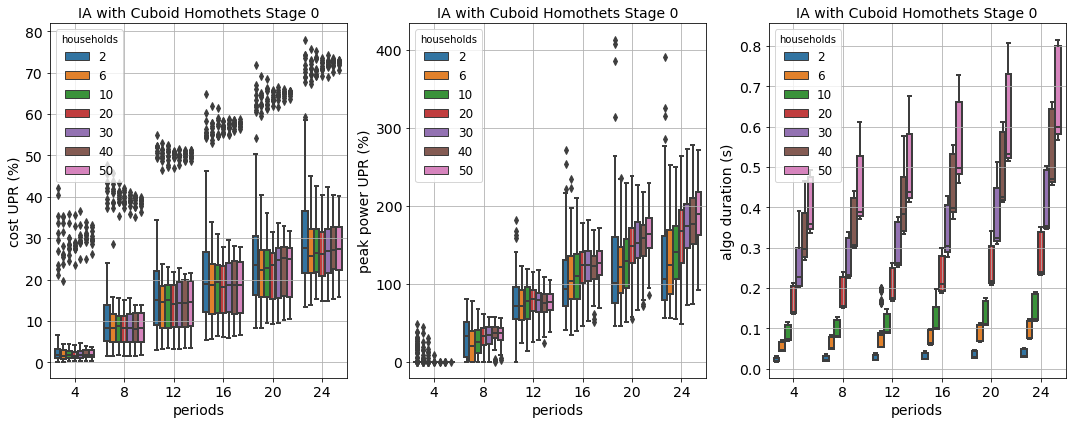

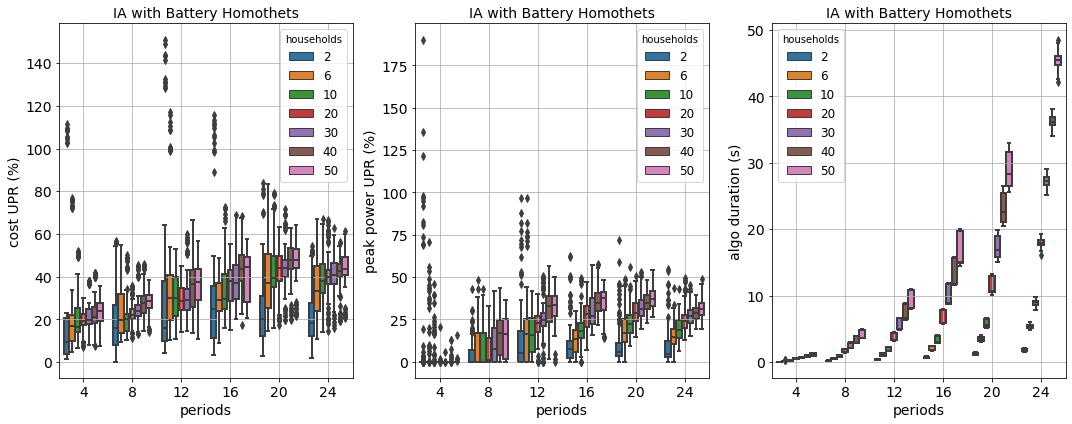

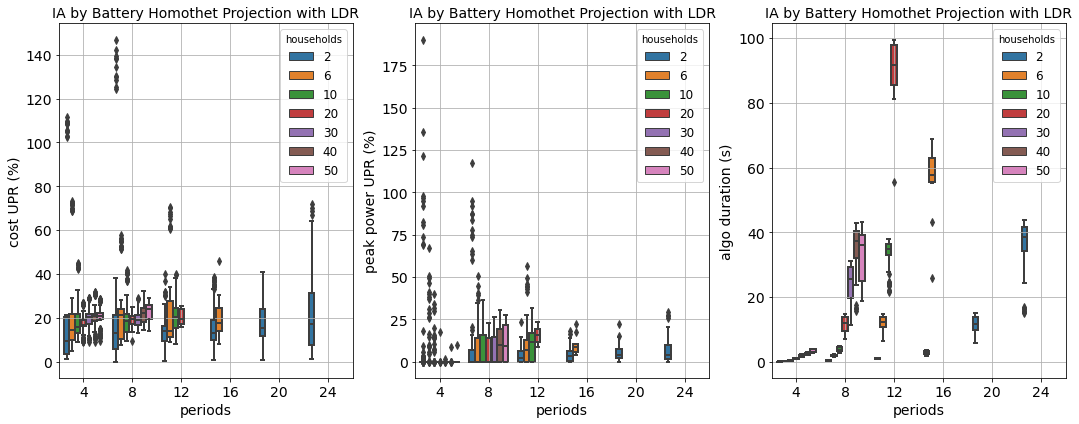

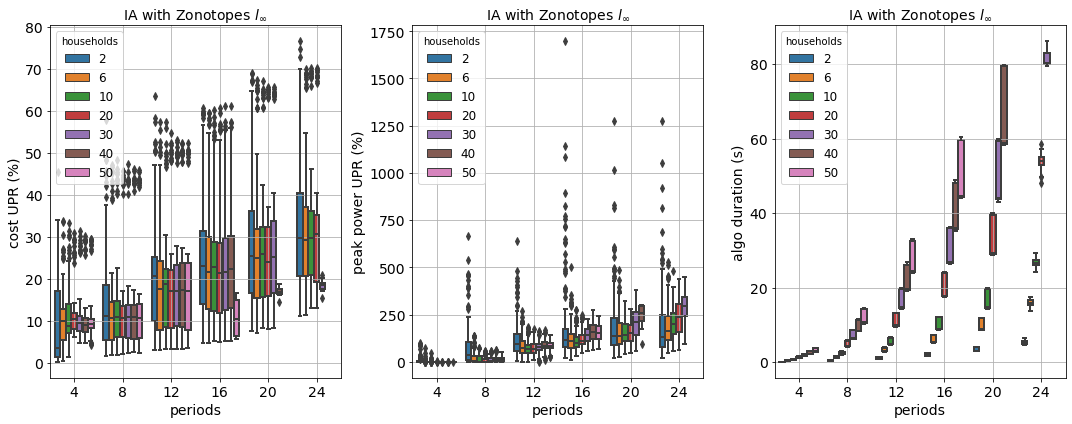

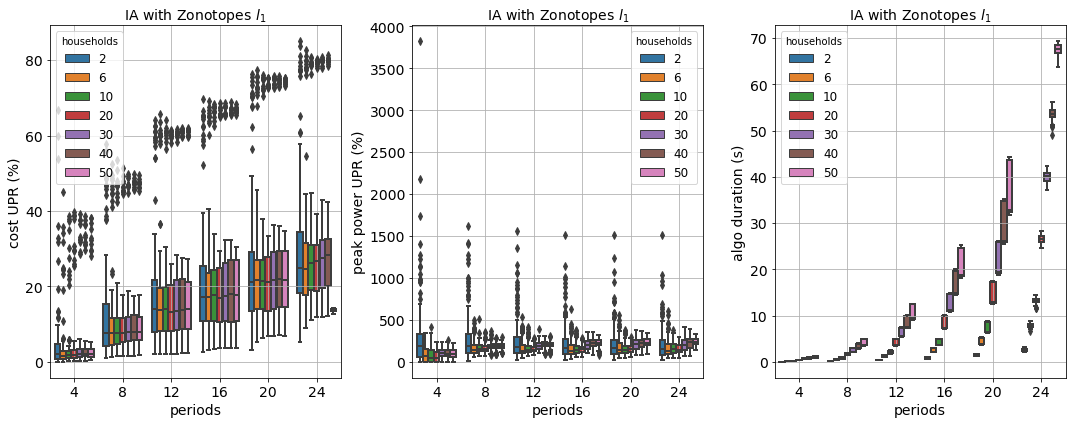

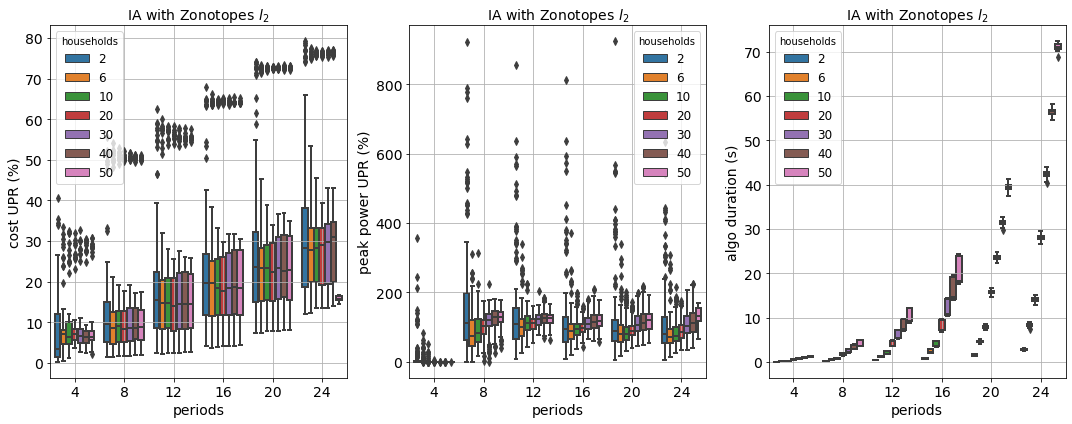

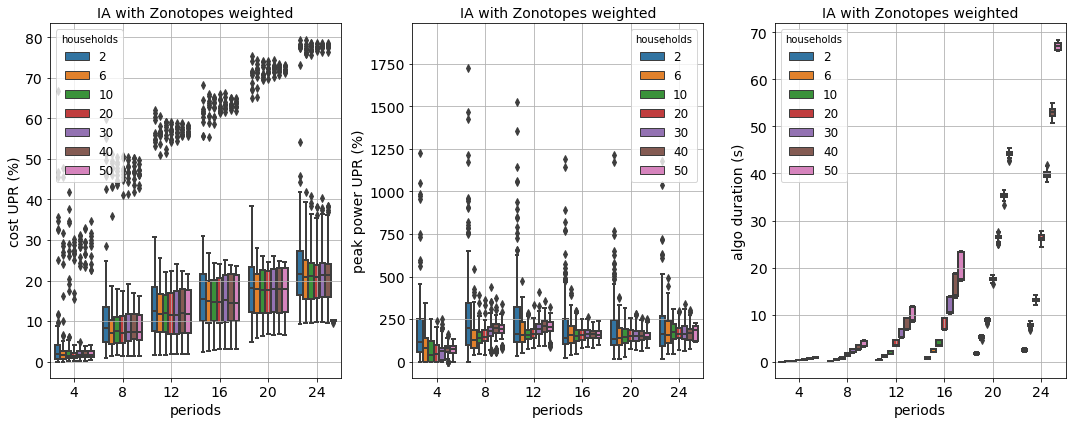

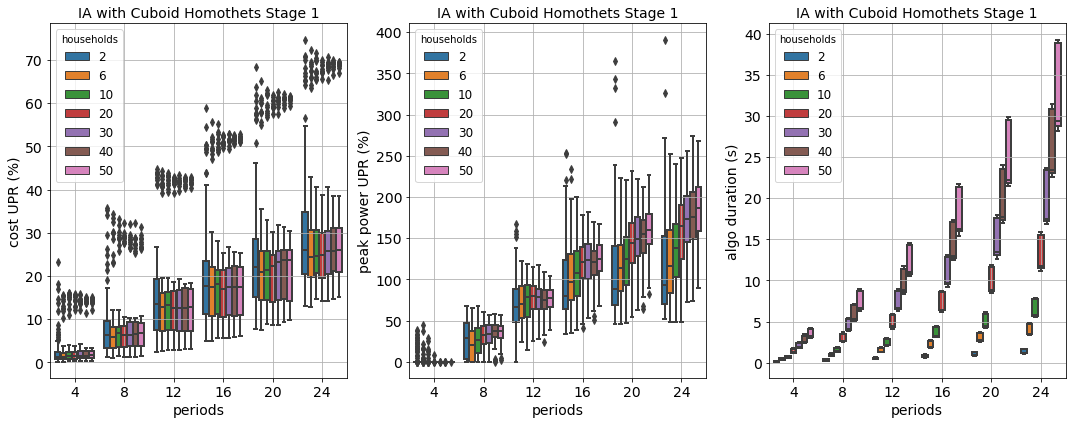

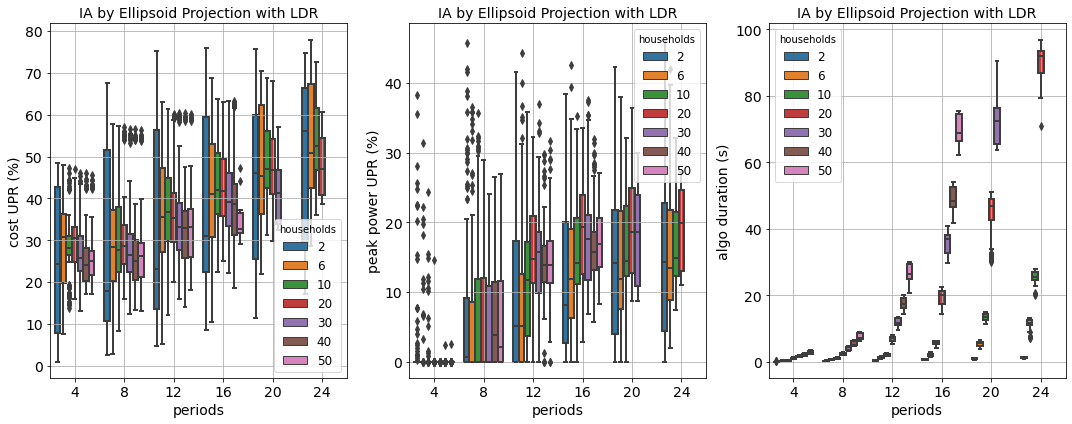

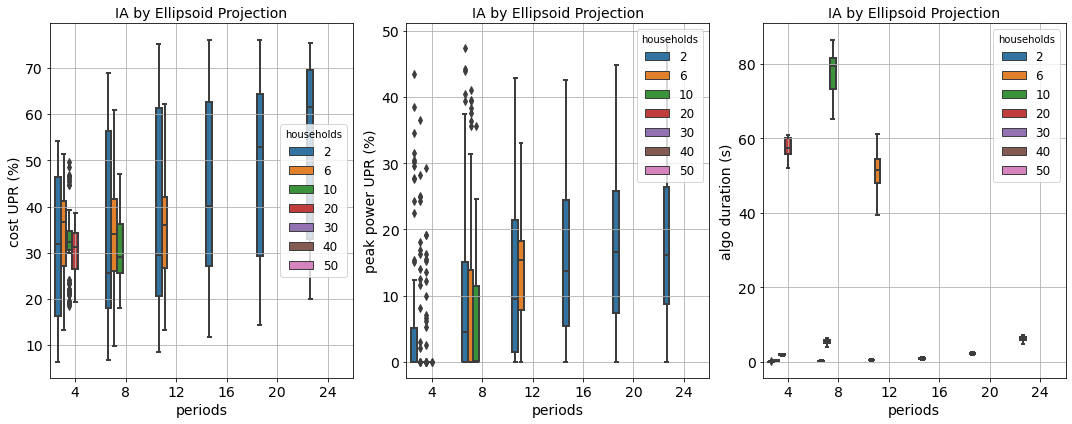

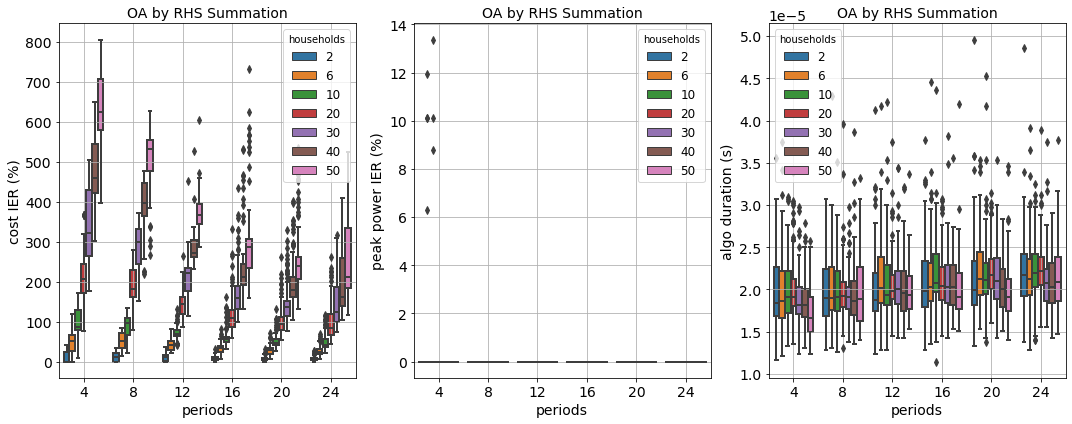

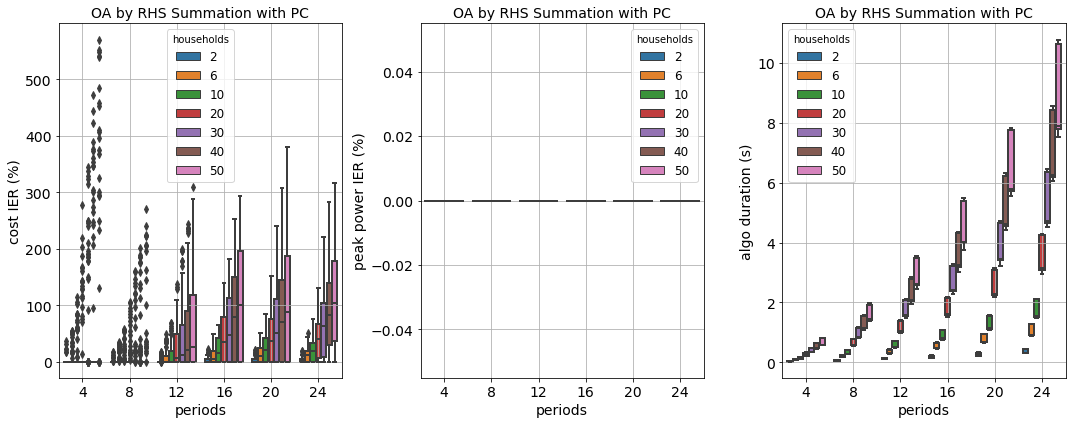

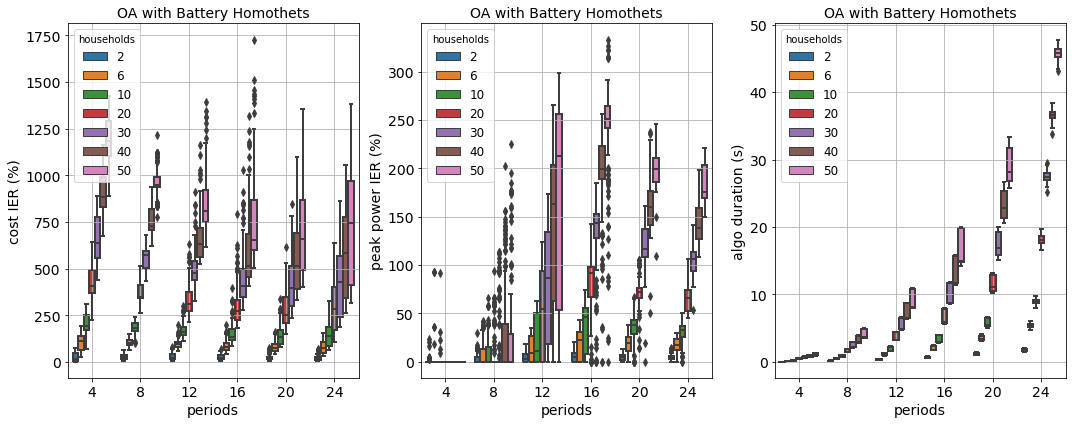

In [12]:
for algo in sel['algos']:
    sel['algo'] = algo
    
    if dsp['algo type'][sel['algo']] == 'inner':
        sel['quantities'] = {'cost_value':'qual. crit.',
                             'peak_value':'qual. crit.',
                             'algo_time' :'raw',
                             #'cost_time' :'raw'
                            }
    elif dsp['algo type'][sel['algo']] == 'outer':
        sel['quantities'] = {'cost_im_en':'qual. crit.',
                             'peak_im_en':'qual. crit.',
                             'algo_time' :'raw',
                             #'cost_time' :'raw'
                            }
    else:
        sel = {}

    sel['periods list'] = cfg_list[0]['periods list']
    # sel['periods list'] = [2, 10]

    sel['households list'] = cfg_list[0]['households list']
    # sel['households list'] = [5, 20]

    # figure structure:
    if len(sel['quantities']) > 1:
        # nrows = int(np.ceil(len(sel['quantities'])/2))
        fig, ax_ = plt.subplots(nrows=1, ncols=3, figsize=(15,6)) #14 #6*nrows (14, 4*nrows)
    else:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
        ax_ = [ax]

    # subplots:
    counter = 0
    for quantity, view in sel['quantities'].items():
        comp = {'algo':sel['algo'], 'quantity':quantity, 'view':view }
        df = lib.tools.target_df(dsp, comp, res)

        if df is not None:
            df.rename(columns={'target':quantity}, inplace=True)

            # slice to selection:
            ind = df['periods'].isin(sel['periods list']) & df['households'].isin(sel['households list'])
            df = df.loc[ind,]

            # cat periods and households values to integer:
            df['periods'] = df['periods'].astype(int)
            df['households'] = df['households'].astype(int)

            # boxplots:
            ax = ax_.flatten()[counter]
            sns.boxplot(ax=ax, x='periods', hue="households", y=quantity, data=df) #, showmeans=True) showfliers=False
            # sns.violinplot(ax=ax, x='periods', hue="households", y=quantity, data=df)
            ax.set_ylabel( dsp['quantity label'][quantity][view] )
            ax.grid(True)
            ax.set_title(f"{sel['algo']}")
            #type = {dsp['algo type'][sel['algo']]}
        counter += 1
    plt.tight_layout()
    
    if sel['algo'] == 'IA with Zonotopes $l_\infty$':
        sel['algo'] = 'IA with Zonotopes infinity'
    # save figure:
    plt.savefig(cfg['figures path'] + sel['algo'] + ".pdf")

### Scratch

413.26254382542925

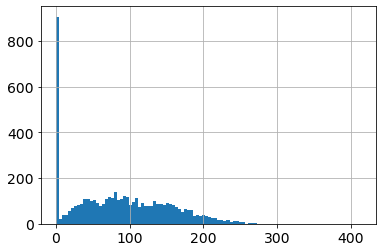

In [13]:
comp = {'algo':'OA by RHS Summation', 'quantity':'cost_im_en', 'view':'qual. crit.' }
comp = {'algo':'IA with Cuboid Homothets Stage 0', 'quantity':'peak_value', 'view':'qual. crit.' }
df = lib.tools.target_df(dsp, comp, res)

# checks:
df['target'].hist(bins=100);
df['target'].min()
df['target'].max()

## Compare Some Algorithms over Settings

In [16]:
styles=['s-','o-','^-','-x','-d','-*','h-','H-','D-','<-']
sel = {}

if 0: # outer
    sel['algos']    = ['OA by RHS Summation', 'OA by RHS Summation with PC', 'OA with Battery Homothets'] 
    
    sel['quantity'] = 'cost_im_en'
    sel['view']     = 'qual. crit.'
    
    #sel['quantity'] = 'algo_time'
    #sel['view']     = 'raw'
    
    sel['serial param'] = 'periods'
    sel['fix param'] = 'households'
    sel['fix value'] = 20
    
    #sel['serial param'] = 'households'
    #sel['fix param'] =  'periods'
    #sel['fix value'] = 24
    
    sel['aggfunc']   = np.median
    
else: # inner
    #sel['algos']    = ['Homothet Stage 0', 'Inner Battery Homothet', 'Homothet Projection',
                       # 'Zonotopes',
    #                   'Union of Homothets Stage 1', 'Zhen Ellipsoid Inner', 'Barot Ellipsoid Inner']
    sel['algos']    = ['IA with Cuboid Homothets Stage 0', 'IA with Battery Homothets', 'IA by Battery Homothet Projection with LDR',
                       'IA with Zonotopes $l_\infty$','IA with Zonotopes $l_1$', 'IA with Zonotopes $l_2$','IA with Zonotopes weighted',
                       'IA with Cuboid Homothets Stage 1', 'IA by Ellipsoid Projection with LDR', 'IA by Ellipsoid Projection']
    
    sel['quantity'] = 'peak_value'
    sel['view']     = 'qual. crit.'
    
    #sel['quantity'] = 'algo_time'
    #sel['view']     = 'raw'
    
    sel['serial param'] = 'periods'
    sel['fix param'] = 'households'
    sel['fix value'] = 20
    
    sel['serial param'] = 'households'
    sel['fix param'] =  'periods'
    sel['fix value'] = 12
    
    sel['aggfunc']   = np.median
    
counter = 0
comp = sel
for algo in sel['algos']:
    comp['algo'] = algo
    if counter == 0:
        df = lib.tools.target_df(dsp, comp, res)
        df
        df.rename(columns={"target": algo}, inplace=True)
    else:
        df_add = lib.tools.target_df(dsp, comp, res)
        df[algo] = df_add['target']
    counter += 1  

ind = df[sel['fix param']] == sel['fix value']
cols = [sel['serial param']] + sel['algos']
rf = df.loc[ind, cols].groupby(by=[sel['serial param']]).aggregate(sel['aggfunc'])
rf.index = rf.index.map(int)

'\nif 1: # outer\n    sel[\'algos\']    = [\'OA by RHS Summation\', \'OA by RHS Summation with PC\', \'OA with Battery Homothets\']\n    \n    sel[\'quantity\'] = \'peak_im_en\'\n    sel[\'view\']     = \'qual. crit.\'\n    \n    #sel[\'quantity\'] = \'algo_time\'\n    #sel[\'view\']     = \'raw\'\n    \n    sel[\'serial param\'] = \'periods\'\n    sel[\'fix param\'] = \'households\'\n    sel[\'fix value\'] = 50\n    \n    #sel[\'serial param\'] = \'households\'\n    #sel[\'fix param\'] =  \'periods\'\n    #sel[\'fix value\'] = 24\n    \n    sel[\'aggfunc\']   = np.median\n    \nelse: # inner\n    #sel[\'algos\']    = [\'Homothet Stage 0\', \'Inner Battery Homothet\', \'Homothet Projection\',\n                       # \'Zonotopes\',\n    #                   \'Union of Homothets Stage 1\', \'Zhen Ellipsoid Inner\', \'Barot Ellipsoid Inner\']\n    sel[\'algos\']    = [\'Homothet Stage 0\', \'Inner Battery Homothet\', \'Homothet Projection\',\'Zonotopes\',\n                       \'Zonoto

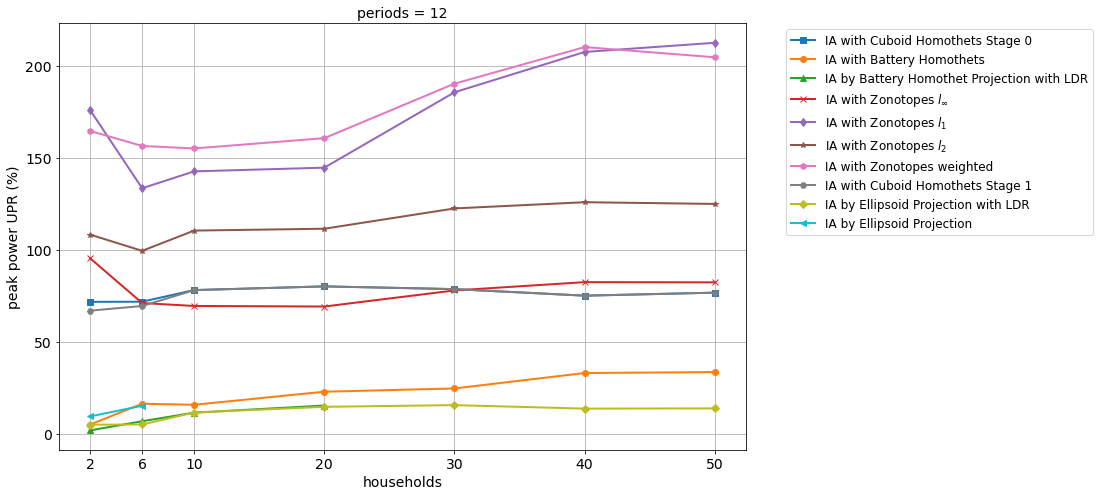

In [17]:
#fig, axes = plt.subplots(nrows=2, ncols=1)
ylabel = dsp['quantity label'][sel['quantity']][sel['view']]
title  = f"{sel['fix param']} = {sel['fix value']}"#aggregation={sel['aggfunc'].__name__}
rf.plot(figsize=(15.5,7), grid=True, ylabel=ylabel, title=title, #figsize=(15.5,7)
        style=styles, xticks=rf.index); #,ax=axes[0] 

plt.legend(bbox_to_anchor=(1.05, 1));
plt.tight_layout();


#plt.legend(loc="upper center");
#axes[0].set_ylim(0,19)
#plt.savefig(cfg['figures path'] +  sel['quantity'] + sel['view'] + sel['serial param'] + sel['fix param'] +  str(sel['fix value']) +".pdf")

"""
if 1: # outer
    sel['algos']    = ['OA by RHS Summation', 'OA by RHS Summation with PC', 'OA with Battery Homothets']
    
    sel['quantity'] = 'peak_im_en'
    sel['view']     = 'qual. crit.'
    
    #sel['quantity'] = 'algo_time'
    #sel['view']     = 'raw'
    
    sel['serial param'] = 'periods'
    sel['fix param'] = 'households'
    sel['fix value'] = 50
    
    #sel['serial param'] = 'households'
    #sel['fix param'] =  'periods'
    #sel['fix value'] = 24
    
    sel['aggfunc']   = np.median
    
else: # inner
    #sel['algos']    = ['Homothet Stage 0', 'Inner Battery Homothet', 'Homothet Projection',
                       # 'Zonotopes',
    #                   'Union of Homothets Stage 1', 'Zhen Ellipsoid Inner', 'Barot Ellipsoid Inner']
    sel['algos']    = ['Homothet Stage 0', 'Inner Battery Homothet', 'Homothet Projection','Zonotopes',
                       'Zonotopes l1', 'Zonotopes l2', 'Union of Homothets Stage 1', 'Zhen Ellipsoid Inner',
                       'Barot Ellipsoid Inner']
    
    sel['quantity'] = 'cost_value'
    sel['view']     = 'qual. crit.'
    
    #sel['quantity'] = 'algo_time'
    #sel['view']     = 'raw'
    
    sel['serial param'] = 'periods'
    sel['fix param'] = 'households'
    sel['fix value'] = 20
    
    sel['serial param'] = 'households'
    sel['fix param'] =  'periods'
    sel['fix value'] = 24
    
    sel['aggfunc']   = np.median
    
counter = 0
comp = sel
for algo in sel['algos']:
    comp['algo'] = algo
    if counter == 0:
        df = lib.tools.target_df(dsp, comp, res)
        df
        df.rename(columns={"target": algo}, inplace=True)
    else:
        df_add = lib.tools.target_df(dsp, comp, res)
        df[algo] = df_add['target']
    counter += 1  

ind = df[sel['fix param']] == sel['fix value']
cols = [sel['serial param']] + sel['algos']
rf = df.loc[ind, cols].groupby(by=[sel['serial param']]).aggregate(sel['aggfunc'])
rf.index = rf.index.map(int)

ylabel = dsp['quantity label'][sel['quantity']][sel['view']]
title  = f"{sel['fix param']} = {sel['fix value']}" #aggregation={sel['aggfunc'].__name__}
rf.plot(figsize=(8,6), grid=True, ylabel=ylabel, title=title, 
        style=styles, xticks=rf.index, ax=axes[1])

#plt.legend(loc="best");
#axes[1].set_ylim(0,19)

plt.tight_layout()
#plt.savefig(cfg['figures path'] + sel['quantity'] + sel['view'] + sel['serial param'] + sel['fix param'] +  str(sel['fix value']) +".pdf")
"""

### Scratch

-4.263256414560601e-14

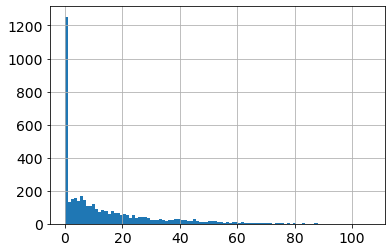

In [16]:
# comp = {'algo':'no flexibility', 'quantity':'peak_value', 'view':'raw' }
# comp = {'algo':'no flexibility', 'quantity':'cost_value', 'view':'raw' }
# comp = {'algo':'Homothet Stage 0', 'quantity':'peak_value', 'view':'raw' }
comp = {'algo':'Zonotopes', 'quantity':'peak_value', 'view':'raw' }
# comp = {'algo':'Zonotopes', 'quantity':'cost_value', 'view':'raw' }
df1 = lib.tools.target_df(dsp, comp, res)

comp = {'algo':'exact',     'quantity':'peak_value', 'view':'raw' }
# comp = {'algo':'exact',     'quantity':'cost_value', 'view':'raw' }
df2 = lib.tools.target_df(dsp, comp, res)

(df1['target'] - df2['target']).hist(bins=100);

(df1['target'] - df2['target']).max()
(df1['target'] - df2['target']).min()

## Compare All Algorithms for Fixed Setting

In [18]:
# reload local functions in lib directory:
importlib.reload(lib)
importlib.reload(lib.tools)

dsp = lib.tools.dsp_default()

,cost UPR (%),algo time (seconds)
,,
IA with Zonotopes weighted,10.11,67.05
IA with Zonotopes $l_1$,13.62,67.74
IA with Zonotopes $l_2$,15.84,71.13
IA with Cuboid Homothets Stage 1,26.06,29.36
IA with Cuboid Homothets Stage 0,27.41,0.60
IA with Battery Homothets,43.32,45.46


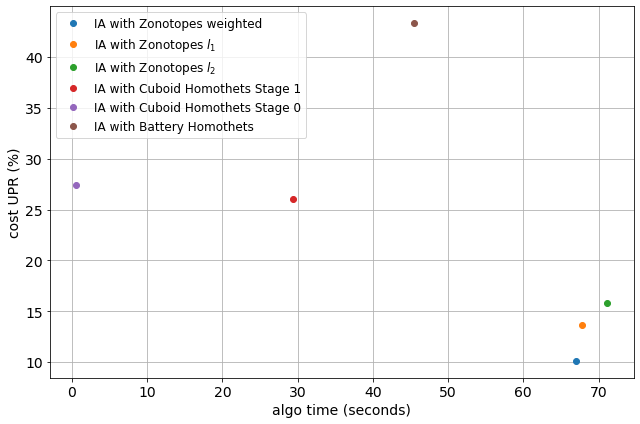

In [19]:
# setting: fix N-M-setting and choose algo type:
stg = {}

if 1: # inner:
    stg = {'periods'   : 24, 
           'households': 50,
           'algo_type' : 'inner',
           #'quantity'  : 'cost_value'  # qual crit are used
           'quantity'  : 'cost_value'
          }
else: # outer:
    stg = {'periods'   : 24, 
           'households': 50,
           'algo_type' : 'outer',
           'quantity'  : 'cost_im_en',
           'quantity' : 'peak_im_en'
          }

pf = lib.tools.pareto(stg, res)
pf
#plt.savefig("paretro_" + stg["algo_type"] + "_" + stg["quantity"] + "_" + str(stg["periods"]) + "_" + str(stg["households"]) + ".pdf")

In [20]:
s = pf.style.format(precision=2)
print(s.to_latex())

\begin{tabular}{lrr}
 & cost UPR (%) & algo time (seconds) \\
 &  &  \\
IA with Zonotopes weighted & 10.11 & 67.05 \\
IA with Zonotopes $l_1$ & 13.62 & 67.74 \\
IA with Zonotopes $l_2$ & 15.84 & 71.13 \\
IA with Cuboid Homothets Stage 1 & 26.06 & 29.36 \\
IA with Cuboid Homothets Stage 0 & 27.41 & 0.60 \\
IA with Battery Homothets & 43.32 & 45.46 \\
\end{tabular}



# Tables

## One Algorithm

In [20]:
sel = {}

# sel['algo'] = 'no flexibility'
# sel['algo'] = 'exact'
# ---------------------------------------------
# sel['algo'] = 'OA by RHS Summation'                        # outer 
# sel['algo'] = 'OA by RHS Summation with PC'                # outer
# sel['algo'] = 'OA with Battery Homothets'                  # outer

# sel['algo'] = 'IA with Cuboid Homothets Stage 0'           # inner
# sel['algo'] = 'IA with Battery Homothets'                  # inner
# sel['algo'] = 'IA by Battery Homothet Projection with LDR' # inner
# sel['algo'] = 'IA with Cuboid Homothets Stage 1'           # inner
# sel['algo'] = 'IA with Zonotopes $l_\infty$'               # inner
# sel['algo'] = 'IA with Zonotopes weighted'
# sel['algo'] = 'IA with Zonotopes $l_1$'
# sel['algo'] = 'IA with Zonotopes $l_2$'
# sel['algo'] = 'IA by Ellipsoid Projection with LDR'        # inner
#sel['algo'] = 'IA by Ellipsoid Projection'                 # inner
# ---------------------------------------------
# sel['algo'] = 'Klaus inner span' # inner
# sel['algo'] = 'Simple Inner' # inner

select = 0
if select == 1:
    sel['algos']    = ['IA with Cuboid Homothets Stage 0', 'IA with Battery Homothets', 'IA by Battery Homothet Projection with LDR',
                       'IA with Zonotopes $l_\infty$','IA with Zonotopes $l_1$', 'IA with Zonotopes $l_2$','IA with Zonotopes weighted',
                       'IA with Cuboid Homothets Stage 1', 'IA by Ellipsoid Projection with LDR', 'IA by Ellipsoid Projection',]
elif select == 0:
    sel['algos']    = ['OA by RHS Summation', 'OA by RHS Summation with PC', 'OA with Battery Homothets'] 

sel['aggfunc']   = np.median
cfg['tables path']  = "C:/Users/ozem/Gittest/aggrflex_ozem/code/Project/results/tables/"

for algo in sel['algos']:
    sel['algo'] = algo
    
    if select == 0: # outer
        #sel['algo'] = 'Barot w. pc.'
        sel['quantity'] = 'cost_im_en'
        #sel['quantity'] = 'peak_im_en'
        sel['view']     = 'qual. crit.'

    elif select == 1: # inner
        #sel['algo'] = 'Homothet Projection'
        sel['quantity'] = 'cost_value'
        #sel['quantity'] = 'peak_value'
        sel['view']     = 'qual. crit.'
        
    #sel['quantity'] = 'algo_time'
    #sel['view']     = 'raw'    

    df = lib.tools.target_df(dsp, sel, res)
    tf = pd.pivot_table(data=df, values='target', index='households', columns='periods', 
                        aggfunc=sel['aggfunc'])
    tf.index = tf.index.map(int)
    tf.columns = tf.columns.map(int)
    tf = tf.round(2)  # rounding!!!
    #tf
    s = tf.style.format(precision=2)
    html = s.to_html()
    
    if sel['algo'] == 'IA with Zonotopes $l_\infty$':
        sel['algo'] = 'IA with Zonotopes infinity'
    
    text_file = open(cfg['tables path'] +sel['algo'] + "_" +sel['quantity']+"_table", "w")
    text_file.write(html)
    text_file.close()

In [41]:
# export table:
# print(tf.style.to_latex())
# tf.to_latex('mytable.tex')

s = tf.style.format(precision=2)
print(s.to_latex())

\begin{tabular}{lrrrrrr}
periods & 4 & 8 & 12 & 16 & 20 & 24 \\
households &  &  &  &  &  &  \\
2 & 9.29 & 16.06 & 15.75 & 24.62 & 20.24 & 18.45 \\
6 & 16.80 & 19.41 & 29.86 & 29.21 & 36.78 & 33.36 \\
10 & 16.28 & 19.86 & 29.73 & 29.53 & 39.51 & 37.99 \\
20 & 19.02 & 22.12 & 28.36 & 37.73 & 44.12 & 39.86 \\
30 & 19.82 & 23.97 & 29.17 & 37.08 & 44.21 & 40.66 \\
40 & 20.93 & 27.54 & 36.58 & 43.57 & 47.85 & 42.62 \\
50 & 24.01 & 28.42 & 37.58 & 44.40 & 47.88 & 43.32 \\
\end{tabular}



In [56]:
#s.to_latex('~/scratch/mytable.tex')
cfg['tables path']  = "C:/Users/ozem/Gittest/results/figures/Tables/"

html = s.to_html()
text_file = open(cfg['tables path'] +sel['algo'] + "_" +sel['quantity']+"_table", "w")
text_file.write(html)
text_file.close()